<a href="https://colab.research.google.com/github/ShvetaNeginhal/stock_prediction/blob/master/StockPredictionYahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of one of the stocks from Yahoo Finance using:-**

1.   Linear Regression
2.   Ridge
3.   Lasso



In [0]:
# Importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import metrics



Using S&P 500 (GSPC) 

In [0]:
#loading data from local drive

from google.colab import files
uploaded = files.upload()


Saving gspc.csv to gspc.csv


In [0]:
# Dataset is now stored in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['gspc.csv']))

In [0]:

df.set_index('Date', inplace=True)
df.head()




,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-09-06,1173.969971,1173.969971,1140.130005,1165.239990,1165.239990,5103980000
2011-09-07,1165.849976,1198.619995,1165.849976,1198.619995,1198.619995,4441040000
2011-09-08,1197.979980,1204.400024,1183.339966,1185.900024,1185.900024,4465170000
2011-09-09,1185.369995,1185.369995,1148.369995,1154.229980,1154.229980,4586370000
2011-09-12,1153.500000,1162.520020,1136.069946,1162.270020,1162.270020,5168550000


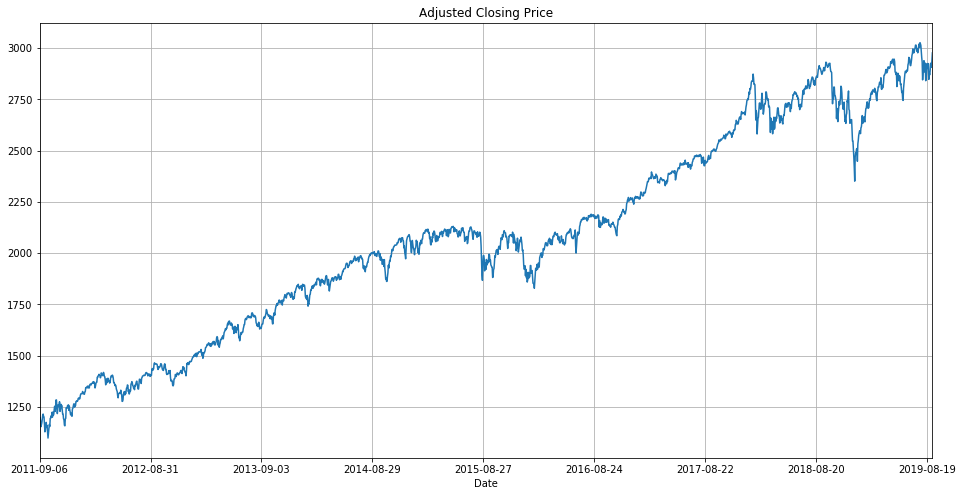

In [0]:
df['Adj Close'].plot(label='GSPC', figsize=(16,8), title='Adjusted Closing Price', grid=True)



In [0]:
#Looking at 32 days in the past
window_size = 32 
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)



In [0]:
data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples



In [0]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [0]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]


Method 1: Linear Regression

In [0]:
 # Train
linear_reg =  LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

#Infer
y_pred_train_linear = linear_reg.predict(X_train)
y_pred_linear = linear_reg.predict(X_test)



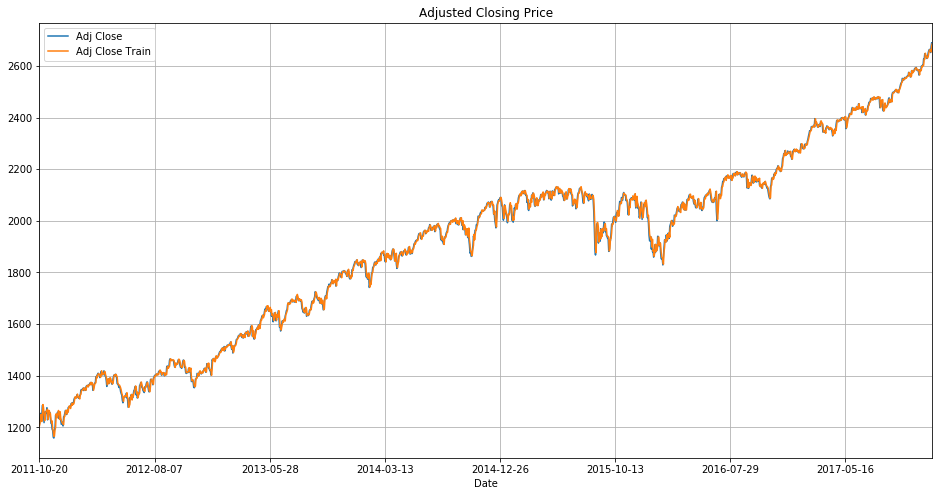

In [0]:
#Plot for training data
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_linear['Adj Close Train'] = y_pred_train_linear[:-window_size]
df_linear.plot(label='GSPC', figsize=(16,8), title='Adjusted Closing Price', grid=True)

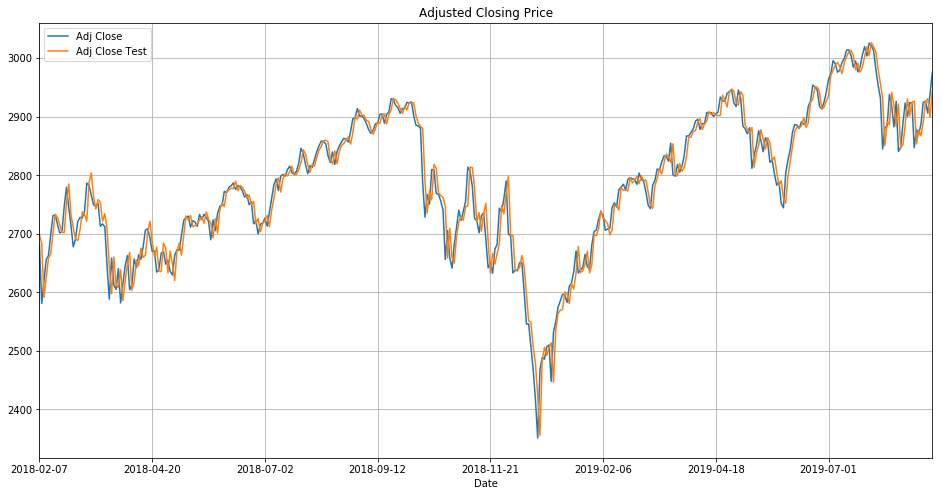

In [0]:
# Plot for testing data
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_linear['Adj Close Test'] = y_pred_linear
df_linear.plot(label='GSPC', figsize=(16,8), title='Adjusted Closing Price', grid=True)

Finding Accuracy Score

Method 2 - Ridge Regression

In [0]:
# Train
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)



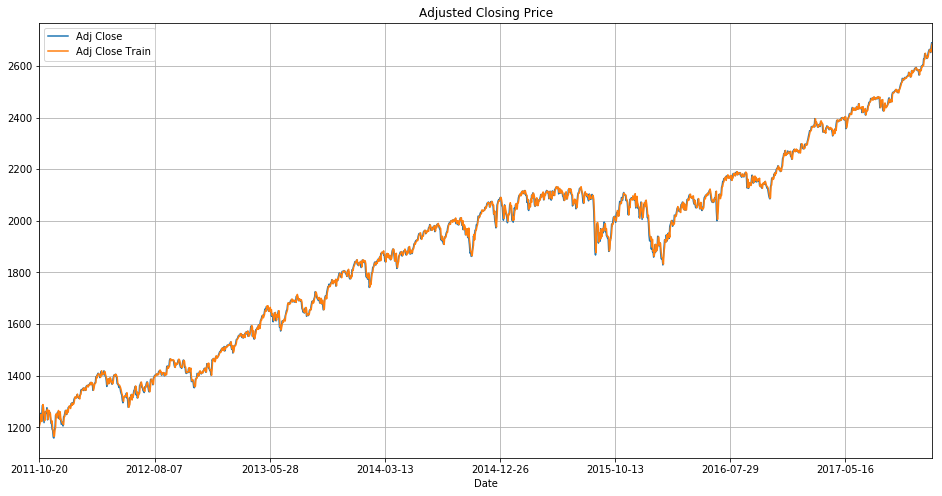

In [0]:
# Plot for the training data
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='GSPC', figsize=(16,8), title='Adjusted Closing Price', grid=True)

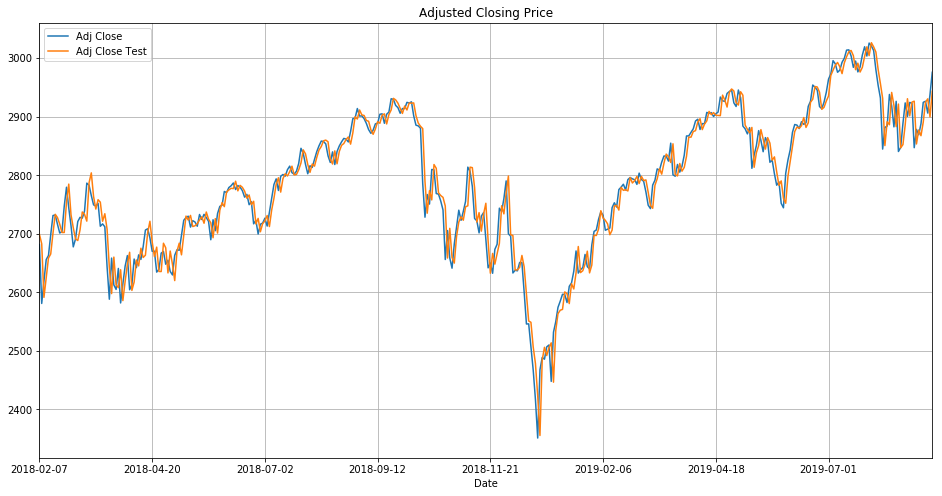

In [0]:
# Plot for test data
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='GSPC', figsize=(16,8), title='Adjusted Closing Price', grid=True)

Method 3 :- Lasso

In [0]:
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Infer
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

#Evaluate
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_lasso)))

31.72263182671469


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226905.2911752866, tolerance: 22816.732419627835
  positive)


32
1584


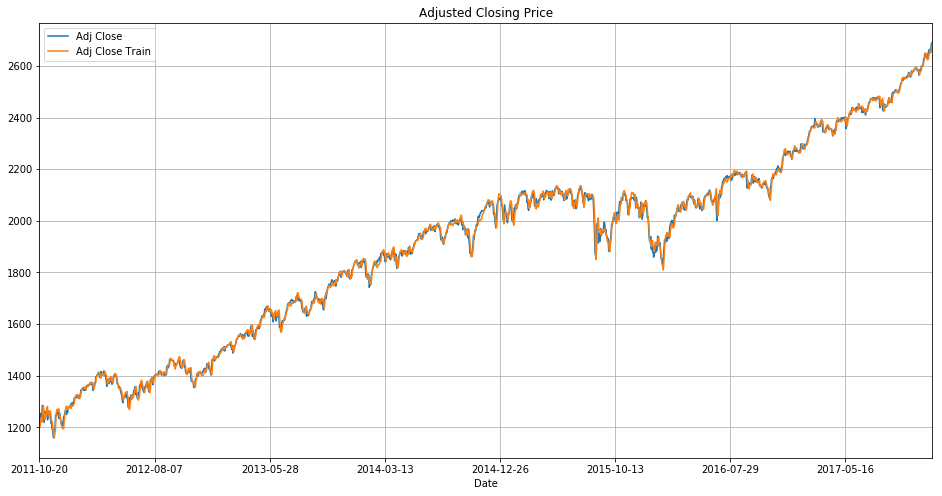

In [0]:
# Plot for the training data
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='GSPC', figsize=(16,8), title='Adjusted Closing Price', grid=True)
print(window_size)
print(ind_split)

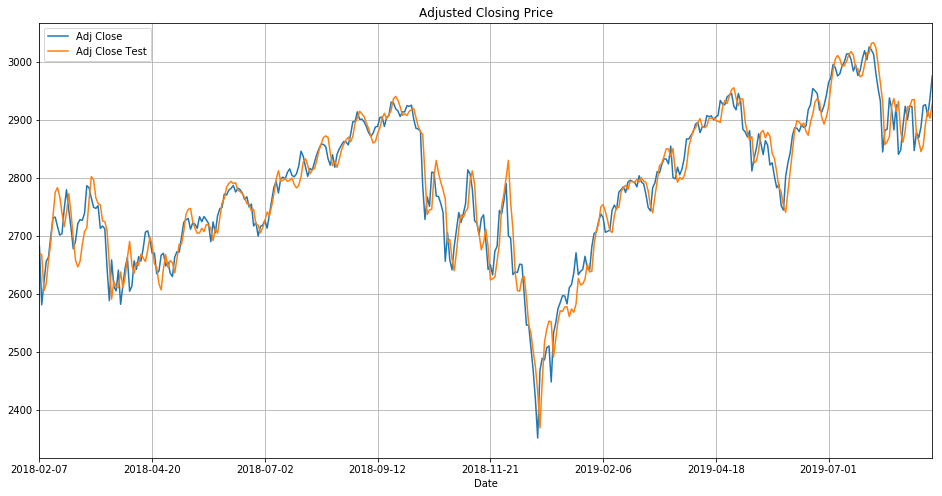

In [0]:
# Same for the test
df_lasso = df.copy()
df_lasso .drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso  = df_lasso .iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_lasso ['Adj Close Test'] = y_pred_lasso
df_lasso .plot(label='GSPC', figsize=(16,8), title='Adjusted Closing Price', grid=True)